<a href="https://colab.research.google.com/github/TranTheVy/PredictHousePrice/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Dataset:
   Area  Bedrooms  Floors  Age   Price
0   800         2       1   10  250000
1   950         2       1    5  280000
2  1200         3       2   15  350000
3  1500         4       2    2  450000
4  1100         3       1    8  320000
5  1300         3       2   12  380000
6  1000         2       1    7  300000
7  1400         4       2    3  420000
8  1600         4       2    1  480000
9   900         2       1    9  270000
------------------------------


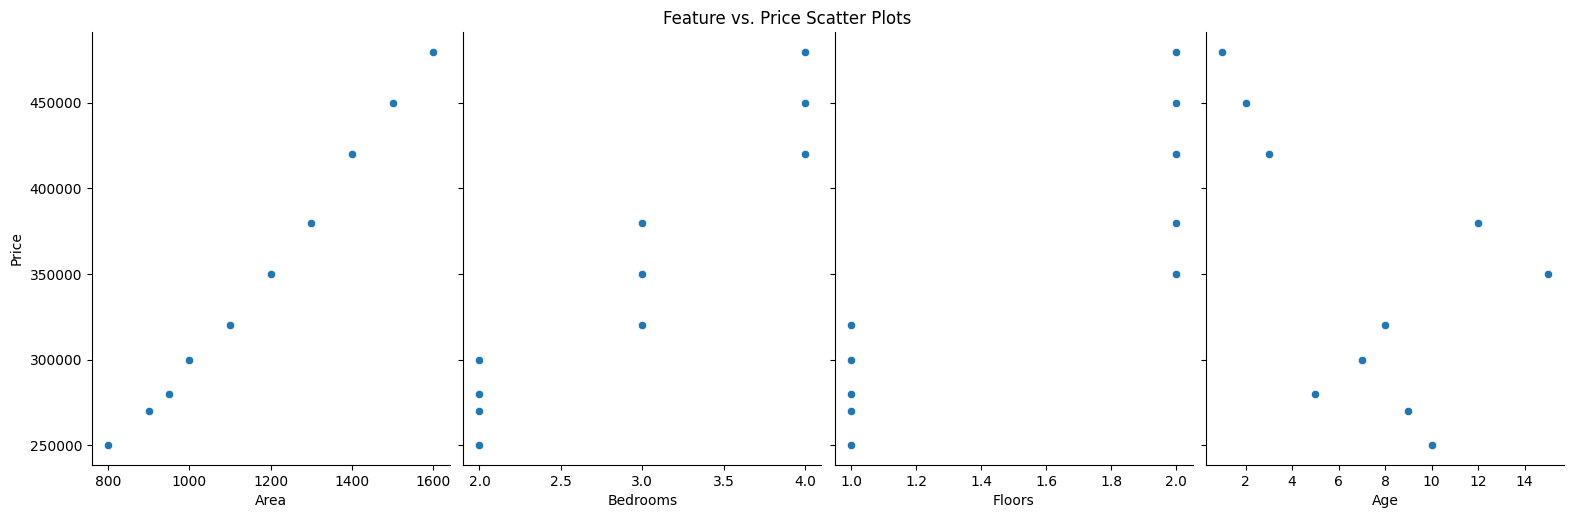

Model Evaluation:
Mean Squared Error (MSE): 112006285.52
R-squared (R2): 0.99
------------------------------
Predicted price for a new house with Area=1150, Bedrooms=3, Floors=2, Age=6: $359079.88
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


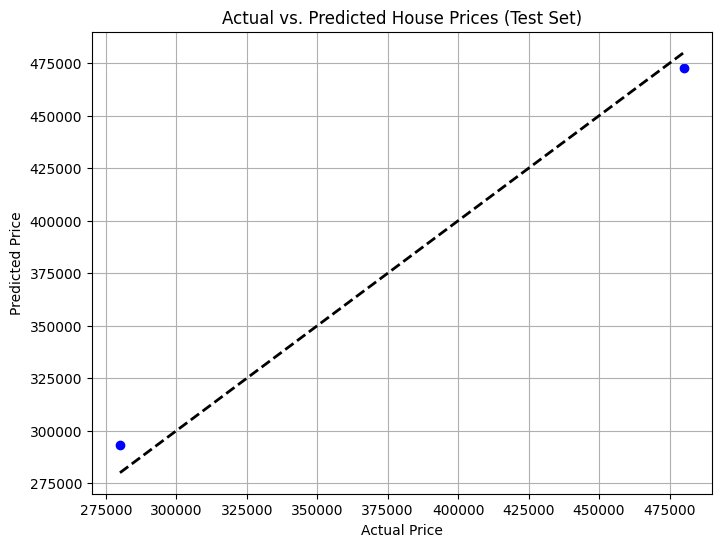

In [9]:
# prompt: import pandas, create dataset feature include Area, Bedrooms, Floors, Age, Price simple, print dataset, visualization with seaborn, matplotlib.pyplot, training with linear regression, train/test rate is 80/20, evaluate model with mean_squared_error, r2_score, predict new house price, visualization actual house price with predict house price

!pip install -q sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create dataset
data = {'Area': [800, 950, 1200, 1500, 1100, 1300, 1000, 1400, 1600, 900],
        'Bedrooms': [2, 2, 3, 4, 3, 3, 2, 4, 4, 2],
        'Floors': [1, 1, 2, 2, 1, 2, 1, 2, 2, 1],
        'Age': [10, 5, 15, 2, 8, 12, 7, 3, 1, 9],
        'Price': [250000, 280000, 350000, 450000, 320000, 380000, 300000, 420000, 480000, 270000]}
df = pd.DataFrame(data)

# Print dataset
print("Dataset:")
print(df)
print("-" * 30)

# Visualization with seaborn and matplotlib.pyplot
sns.pairplot(df, x_vars=['Area', 'Bedrooms', 'Floors', 'Age'], y_vars='Price', height=5, aspect=0.8)
plt.suptitle('Feature vs. Price Scatter Plots', y=1.02)
plt.show()

# Training with linear regression
X = df[['Area', 'Bedrooms', 'Floors', 'Age']]
y = df['Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")
print("-" * 30)

# Predict new house price
new_house = [[1150, 3, 2, 6]]
predicted_price = model.predict(new_house)
print(f"Predicted price for a new house with Area=1150, Bedrooms=3, Floors=2, Age=6: ${predicted_price[0]:.2f}")
print("-" * 30)

# Visualization actual house price with predict house price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices (Test Set)')
plt.grid(True)
plt.show()